In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
from sklearn.cluster import KMeans
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from math import cos, asin, sqrt

In [3]:
df = pd.read_csv('./../data/USGS/earthquake.csv')

In [4]:
df

,type,id,mag,place,time,updated,tz,url,detail,felt,...,dmin,rms,gap,magType,earthquake,title,point,long,lat,depth
0,Feature,nn00764023,3.30,"26 km S of Mina, Nevada",1595960293470,1595989359852,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,1.0,...,0.0080,0.1371,42.47,ml,earthquake,"M 3.3 - 26 km S of Mina, Nevada",Point,-118.062200,38.158200,6.100
1,Feature,ci38612074,3.41,"93km ESE of Maneadero, B.C., MX",1595886184300,1595946468280,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,0.1245,0.0300,271.00,ml,earthquake,"M 3.4 - 93km ESE of Maneadero, B.C., MX",Point,-115.735333,31.273667,12.360
2,Feature,us6000b4kw,3.40,"13 km SW of Stanley, Idaho",1595827334130,1596420727449,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,9.0,...,0.7550,0.6700,73.00,ml,earthquake,"M 3.4 - 13 km SW of Stanley, Idaho",Point,-115.080100,44.144300,10.000
3,Feature,nn00763446,3.20,"38 km SE of Mina, Nevada",1595759467448,1595780721071,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,0.0410,0.1600,57.91,ml,earthquake,"M 3.2 - 38 km SE of Mina, Nevada",Point,-117.754600,38.187100,12.500
4,Feature,nn00763220,4.40,"38 km SE of Mina, Nevada",1595729188540,1596574594112,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,13.0,...,0.0440,0.1980,57.87,ml,earthquake,"M 4.4 - 38 km SE of Mina, Nevada",Point,-117.754600,38.183600,12.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17903,Feature,usp0009kqf,3.50,Maine,946933550000,1415322556936,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,NaN,NaN,NaN,mblg,earthquake,M 3.5 - Maine,Point,-70.170000,44.310000,9.700
17904,Feature,ci9132273,3.14,"19km N of Twentynine Palms, CA",946835912820,1459558058523,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,NaN,0.1720,65.50,ml,earthquake,"M 3.1 - 19km N of Twentynine Palms, CA",Point,-116.072000,34.309000,0.801
17905,Feature,nc21075275,3.11,Central California,946828180650,1524608509943,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,0.2252,0.0600,107.00,md,earthquake,M 3.1 - Central California,Point,-118.696000,38.038333,-0.903
17906,Feature,usp0009kks,4.70,"southern Quebec, Canada",946725777000,1587060853431,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,NaN,NaN,NaN,mb,earthquake,"M 4.7 - southern Quebec, Canada",Point,-78.930000,46.888000,18.000


In [5]:
# changing the time to be a useable value
df['time'] = pd.to_datetime(df['time'], unit='ms')
df.head()

,type,id,mag,place,time,updated,tz,url,detail,felt,...,dmin,rms,gap,magType,earthquake,title,point,long,lat,depth
0,Feature,nn00764023,3.30,"26 km S of Mina, Nevada",2020-07-28 18:18:13.470,1595989359852,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,1.0,...,0.0080,0.1371,42.47,ml,earthquake,"M 3.3 - 26 km S of Mina, Nevada",Point,-118.062200,38.158200,6.10
1,Feature,ci38612074,3.41,"93km ESE of Maneadero, B.C., MX",2020-07-27 21:43:04.300,1595946468280,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,0.1245,0.0300,271.00,ml,earthquake,"M 3.4 - 93km ESE of Maneadero, B.C., MX",Point,-115.735333,31.273667,12.36
2,Feature,us6000b4kw,3.40,"13 km SW of Stanley, Idaho",2020-07-27 05:22:14.130,1596420727449,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,9.0,...,0.7550,0.6700,73.00,ml,earthquake,"M 3.4 - 13 km SW of Stanley, Idaho",Point,-115.080100,44.144300,10.00
3,Feature,nn00763446,3.20,"38 km SE of Mina, Nevada",2020-07-26 10:31:07.448,1595780721071,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,0.0410,0.1600,57.91,ml,earthquake,"M 3.2 - 38 km SE of Mina, Nevada",Point,-117.754600,38.187100,12.50
4,Feature,nn00763220,4.40,"38 km SE of Mina, Nevada",2020-07-26 02:06:28.540,1596574594112,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,13.0,...,0.0440,0.1980,57.87,ml,earthquake,"M 4.4 - 38 km SE of Mina, Nevada",Point,-117.754600,38.183600,12.60


Removing the data from mexico, canada and the ocean

In [6]:
df = df[(df['lat']>31.504) | (df['long']>-105.82)]

In [7]:
df = df[(df['lat']>34.525) | (df['long']<-74.355)]

In [8]:
df = df[~df.place.str.contains("Canada")]

Fixing missing values based on the knowledge of the data found here 
https://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php

In [9]:
# put in 0 as felt is based on reporting
df['felt'].fillna(0, inplace=True)

In [10]:
# related to calculated depth, small number means better calculated so put in highest number for na
df['dmin'].fillna(7, inplace=True)

In [11]:
# based on number of stations reporting the earthquake
df['nst'].fillna(0, inplace= True)

In [12]:
# code help https://datascience.stackexchange.com/questions/17769/how-to-fill-missing-value-based-on-other-columns-in-pandas-dataframe
# cdi is intensity as reported which is a bit different from mag but uses a similar scale and should be close
# using mag as a best guess
df['cdi']= df.apply(
    lambda row: row['mag'] if np.isnan(row['cdi']) else row['cdi'],
    axis=1
)

In [13]:
# very similar to cdi
df['mmi']= df.apply(
    lambda row: row['mag'] if np.isnan(row['mmi']) else row['mmi'],
    axis=1
)

In [14]:
# root mean squared travel time from point to station, not sure what to do with this so trying to just use mean
df['rms'].fillna(df['rms'].mean(), inplace=True)

In [15]:
# similar to rms this is related to what a station calculated, trying out mean
df['gap'].fillna(df['gap'].mean(), inplace=True)

In [16]:
df.isnull().sum()

type              0
id                0
mag               0
place             0
time              0
updated           0
tz             8009
url               0
detail            0
felt              0
cdi               0
mmi               0
alert         15834
status            0
tsunami           0
sig               0
net               0
code              0
ids               0
sources           0
types             0
nst               0
dmin              0
rms               0
gap               0
magType           1
earthquake        0
title             0
point             0
long              0
lat               0
depth             0
dtype: int64

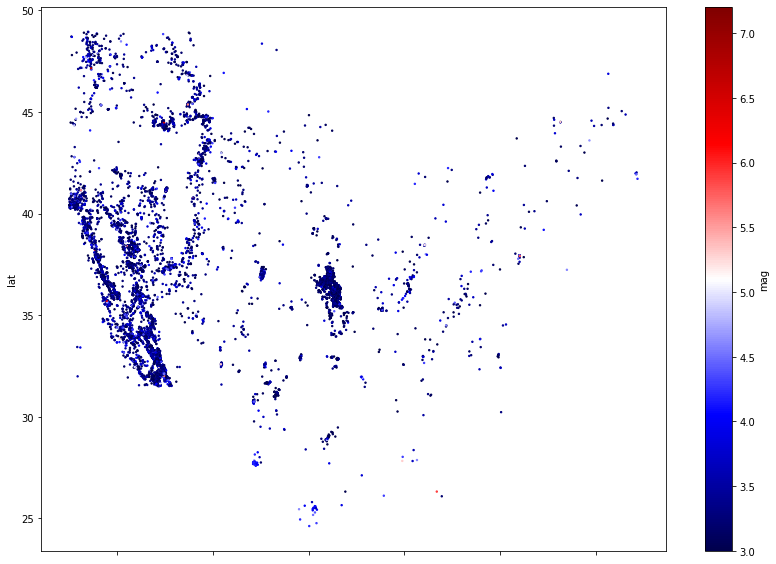

In [17]:
# plotting the locations of the events
df.plot(kind="scatter", x="long", y="lat", c="mag",
         cmap="seismic", figsize=(14, 10), s=2);

In [18]:
# creating a column to try and use with geopandas
# code help from https://geopandas.org/gallery/create_geopandas_from_pandas.html#sphx-glr-gallery-create-geopandas-from-pandas-py
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.long, df.lat))

In [19]:
gdf

,type,id,mag,place,time,updated,tz,url,detail,felt,...,rms,gap,magType,earthquake,title,point,long,lat,depth,geometry
0,Feature,nn00764023,3.30,"26 km S of Mina, Nevada",2020-07-28 18:18:13.470,1595989359852,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,1.0,...,0.137100,42.470000,ml,earthquake,"M 3.3 - 26 km S of Mina, Nevada",Point,-118.0622,38.158200,6.100,POINT (-118.06220 38.15820)
2,Feature,us6000b4kw,3.40,"13 km SW of Stanley, Idaho",2020-07-27 05:22:14.130,1596420727449,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,9.0,...,0.670000,73.000000,ml,earthquake,"M 3.4 - 13 km SW of Stanley, Idaho",Point,-115.0801,44.144300,10.000,POINT (-115.08010 44.14430)
3,Feature,nn00763446,3.20,"38 km SE of Mina, Nevada",2020-07-26 10:31:07.448,1595780721071,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.0,...,0.160000,57.910000,ml,earthquake,"M 3.2 - 38 km SE of Mina, Nevada",Point,-117.7546,38.187100,12.500,POINT (-117.75460 38.18710)
4,Feature,nn00763220,4.40,"38 km SE of Mina, Nevada",2020-07-26 02:06:28.540,1596574594112,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,13.0,...,0.198000,57.870000,ml,earthquake,"M 4.4 - 38 km SE of Mina, Nevada",Point,-117.7546,38.183600,12.600,POINT (-117.75460 38.18360)
5,Feature,nn00763107,3.10,"26 km SSE of Mina, Nevada",2020-07-25 18:32:16.121,1595730079498,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.0,...,0.132400,43.780000,ml,earthquake,"M 3.1 - 26 km SSE of Mina, Nevada",Point,-117.9694,38.175900,2.200,POINT (-117.96940 38.17590)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17902,Feature,ci9132433,3.49,"8km NNE of Yucaipa, CA",2000-01-03 21:59:31.780,1459569685781,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.0,...,0.192000,22.400000,ml,earthquake,"M 3.5 - 8km NNE of Yucaipa, CA",Point,-117.0080,34.101000,2.269,POINT (-117.00800 34.10100)
17903,Feature,usp0009kqf,3.50,Maine,2000-01-03 21:05:50.000,1415322556936,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.0,...,0.315429,98.718967,mblg,earthquake,M 3.5 - Maine,Point,-70.1700,44.310000,9.700,POINT (-70.17000 44.31000)
17904,Feature,ci9132273,3.14,"19km N of Twentynine Palms, CA",2000-01-02 17:58:32.820,1459558058523,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.0,...,0.172000,65.500000,ml,earthquake,"M 3.1 - 19km N of Twentynine Palms, CA",Point,-116.0720,34.309000,0.801,POINT (-116.07200 34.30900)
17905,Feature,nc21075275,3.11,Central California,2000-01-02 15:49:40.650,1524608509943,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.0,...,0.060000,107.000000,md,earthquake,M 3.1 - Central California,Point,-118.6960,38.038333,-0.903,POINT (-118.69600 38.03833)


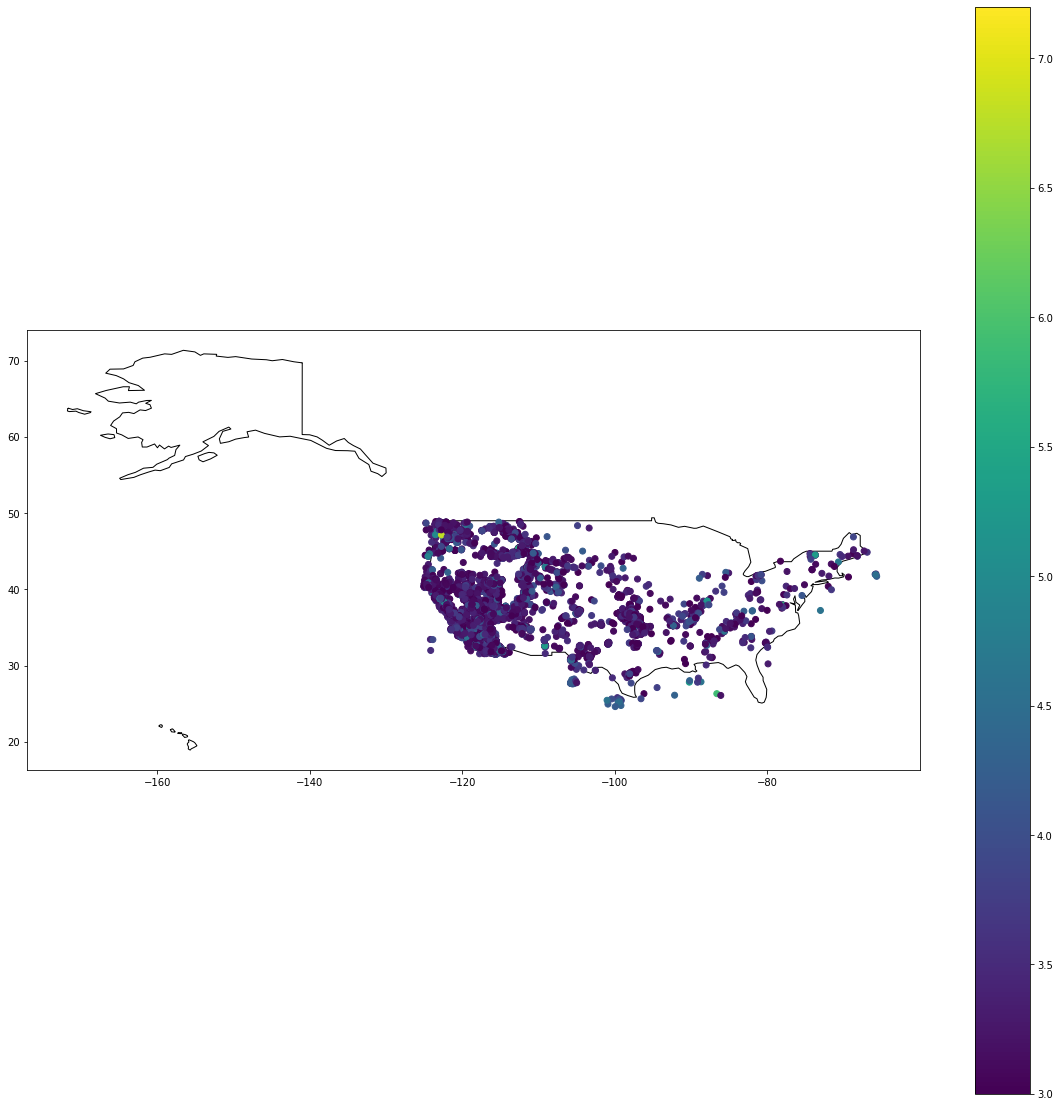

In [20]:
# trying to plot with geo pandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


ax = world[world.name == 'United States of America'].plot(
    color='white', edgecolor='black', figsize=(20,20))


gdf.plot(column ='mag', ax=ax, legend=True)


In [21]:
#lesson 8.04 creating a datafrmae to look at just locations for kmeans
geo = df[['lat', 'long']]
geo.head()

,lat,long
0,38.1582,-118.0622
2,44.1443,-115.0801
3,38.1871,-117.7546
4,38.1836,-117.7546
5,38.1759,-117.9694


In [22]:
#cluster number from later operation
km = KMeans(n_clusters=140, random_state=42)
km.fit(geo)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=140, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [23]:
km.predict(geo)

array([ 53,  12,  53, ...,  62, 112,  67], dtype=int32)

In [24]:
# setting the centroids as a dataframe for later use
centroids = pd.DataFrame(km.cluster_centers_, columns = ['lat','long'])

In [25]:
# putting the cluster back into the origianl data frame
df['clusters'] = km.labels_

In [26]:
df.groupby('clusters')['sig'].mean().sort_values()

clusters
29     151.000000
115    156.600000
36     158.500000
6      161.144893
113    164.347826
          ...    
133    441.600000
58     448.250000
94     485.750000
89     523.888889
97     534.769231
Name: sig, Length: 140, dtype: float64

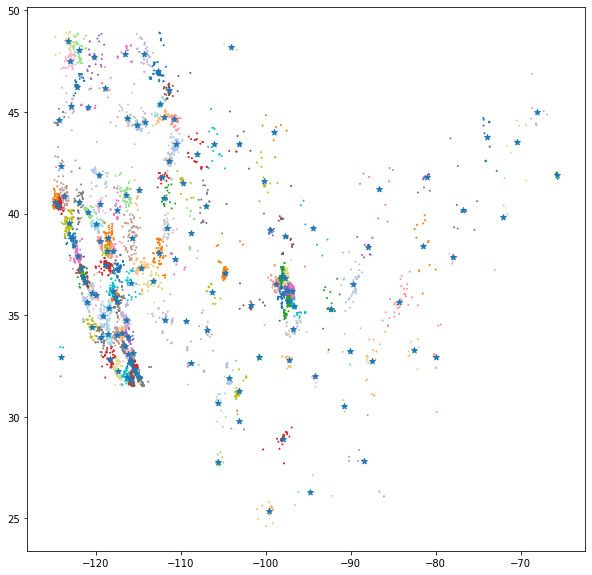

In [27]:
# plotting the kmeans with the centroids
plt.figure(figsize=(10, 10))
plt.scatter(df.long, df.lat, c=km.labels_, s=1, cmap="tab20");
plt.scatter(centroids['long'], centroids['lat'], marker='*')

In order to figure out a good number for the k for the clustering I will set up a linear regressor.  I will ust the significane value as the target and take a set of the numerical columns as the features.

In [28]:
features = ['mag', 'cdi', 'dmin', 'mmi', 'depth', 'felt', 'gap', 'rms']

In [29]:
X = df[features].copy()
y = df['sig']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X.copy(), y.copy(), random_state=42)

In [31]:
# baseling test for the regressor
lr = LinearRegression()
lr.fit(X_train, y_train);

In [32]:
lr.score(X_train, y_train)

0.6755149008900039

In [33]:

lr.score(X_test, y_test)

0.6817377247912946

In [34]:
# from lesson 8.04 to try and find the number of k values to use for the centroids
# looping through the k values to look for a good number
def transfer_tune(X, y, k):
    location_data = df[["long", "lat"]]
    km = KMeans(n_clusters=k)
    km.fit(location_data)
    X.loc[:, "cluster"] = km.predict(location_data)
    X_dummy = pd.get_dummies(columns=["cluster"], data=X)
    X_train, X_test, y_train, y_test = train_test_split(
        X_dummy.copy(), y.copy(), random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    r2 = model.score(X_test, y_test)
    print(f"{k} : {r2}")

In [35]:
for k in range(2, 201, 10):
    transfer_tune(X, y, k)

2 : 0.6815917574189383
12 : 0.6875992058219206
22 : 0.7052538667688498
32 : 0.7068514954138999
42 : 0.7130590581087641
52 : 0.712582159762639
62 : 0.724951786495933
72 : 0.730730438251191
82 : 0.7296018273381624
92 : 0.7316395345400633
102 : 0.7367751518989014
112 : 0.7360888568828459
122 : 0.7377809480204007
132 : 0.7386810320130214
142 : 0.7363857246368885
152 : 0.7387446830016953
162 : 0.7379716391128368
172 : 0.73833828918928
182 : 0.7383942211421906
192 : -239999346264.53433


With the K values I am now setting up a dataframe with the centroids.  This will have the average significance value and the number of events for each centroid

In [36]:
centroids['sig'] = round((df.groupby('clusters')['sig'].mean() / 200), 2)

In [37]:
centroids['num_of_events'] = df.groupby('clusters')['sig'].count()

In [38]:
centroids

,lat,long,sig,num_of_events
0,36.047531,-98.104441,0.84,111
1,37.284596,-117.354325,0.89,106
2,47.014553,-112.654438,1.02,96
3,32.650284,-115.809198,0.98,658
4,38.794975,-122.775934,1.02,388
...,...,...,...,...
135,33.218928,-90.121700,1.20,6
136,30.668635,-105.634965,1.03,31
137,45.379329,-112.478862,0.98,77
138,35.363351,-118.456555,1.02,76


This next part is taking the centroids dataframe and using it to find the nearest centroid from a given point by creating a distance from the lat and long numbers and then using that to give some information about the eartquakes near a chosen point

In [42]:
# code from https://stackoverflow.com/questions/41336756/find-the-closest-latitude-and-longitude


def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p)*cos(lat2*p) * (1-cos((lon2-lon1)*p)) / 2
    return 12742 * asin(sqrt(a))

def closest(data, v):
    min_dist=0    
    cent = 0
    for x in data.index:
        dist = distance(v['lat'],v['long'],data['lat'][x],data['long'][x])
        if min_dist == 0:
            min_dist = dist            
            cent = x
        elif min_dist > dist:
            min_dist = dist            
            cent = x
        
    return min_dist, cent

In [43]:
v = {'lat': 39.739235,'long': -104.990250}
earth_center = closest(centroids, v)

In [44]:
earth_center[0]

186.90055799257829

In [45]:
print(f'You are {earth_center[0]} km from the nearest earthquake center')
print(f'This location has an earthquake danger of {centroids["sig"][earth_center[1]]} ')
print(f'This location has {centroids["num_of_events"][earth_center[1]]} earthquake events in the last 20 years')

You are 186.90055799257829 km from the nearest earthquake center
This location has an earthquake danger of 0.98 
This location has 24 earthquake events in the last 20 years


In [46]:
centroids.to_csv('./../data/USGS/centroids.csv', index=False)

In [47]:
df.to_csv('./../data/USGS/earthquake_clean.csv', index=False)